# Sentinel-1 Backscatter Time Series Analysis via Statistical API

In [1]:
import os
import yaml
from munch import munchify

### _Setup configuration and environment_

In [2]:
# define repo name and get root working directory
repo = 'statistical'
root_path = os.getcwd()[ 0 : os.getcwd().find( repo ) + len ( repo )]

# get path to configuration files
cfg_path = os.path.join( root_path, 'cfg' )
cfg_path = os.path.join( cfg_path, 'sentinel-1' )

In [3]:
# get path to configuration files
cfg_path = os.path.join( root_path, 'cfg' )
cfg_path = os.path.join( cfg_path, 'sentinel-1' )
cfg_path

'C:\\Users\\crwil\\Documents\\GitHub\\sentinelhub\\apis\\statistical\\cfg\\sentinel-1'

In [4]:
# get pathname to configuration file
cfg_file = os.path.join( cfg_path, 's1-metrics.yml' )

In [5]:
# print contents of configuration file
with open( cfg_file ) as f:
    print ( f.read() )

request:
    evalscript: |
                //VERSION=3
                function setup() {
                    return {
                        input: [{
                            bands: [
                                "VV",
                                "VH",
                                "shadowMask",
                                "dataMask"
                            ]
                        }],
                        output: [
                        {
                            id: "stats",
                            bands: [ "band_vv", "band_vh", "band_rvi" ],
                            sampleType: "FLOAT32"                            
                        },
                        {
                            id: "dataMask",
                            bands: 1
                        }]                        
                    }
                }
                function evaluatePixel(samples) {

                    // create qa mask
                    v

In [6]:
# load cfg file using yaml parser
with open( cfg_file, 'r' ) as f:
    config = munchify( yaml.safe_load( f ) )
config

Munch({'request': Munch({'evalscript': '//VERSION=3\nfunction setup() {\n    return {\n        input: [{\n            bands: [\n                "VV",\n                "VH",\n                "shadowMask",\n                "dataMask"\n            ]\n        }],\n        output: [\n        {\n            id: "stats",\n            bands: [ "band_vv", "band_vh", "band_rvi" ],\n            sampleType: "FLOAT32"                            \n        },\n        {\n            id: "dataMask",\n            bands: 1\n        }]                        \n    }\n}\nfunction evaluatePixel(samples) {\n\n    // create qa mask\n    var qaMask = 1\n    if ( samples.shadowMask > 0 ) {\n        qaMask = 0\n    }\n\n    // degree of polarization\n    var dop = ( samples.VV/( samples.VV + samples.VH ) ); \n    var m = 1 - dop;  \n    var rvi = (Math.sqrt(dop))*((4*(samples.VH))/( samples.VV + samples.VH));\n\n    return {\n        stats: [ samples.VV, samples.VH, rvi ],\n        dataMask: [ samples.dataMask 

### _Replicate use case results taken from Sentinel-Hub documentation_

In [7]:
# define aggregation timeframe
from datetime import datetime
timeframe = { 'start' : datetime.strptime('2020-05-01', '%Y-%m-%d'), 
              'end' : datetime.strptime('2020-09-30', '%Y-%m-%d') }

In [8]:
# create instance of shclient class
from statisticalapi import Client
client = Client( config )

In [9]:
from sentinelhub import CRS

# define min and max latlons
coords = 414315, 4958219, 414859, 4958819
crs = CRS( 32633 )
bbox = client.getBoundingBox( coords, src_crs=crs )

In [10]:
# submit request
response = client.getStatistics( [ timeframe ], resolution=10, bbox=bbox, interval='P1D' )

In [11]:
response._dfs[ 0 ]

,id,interval_from,interval_to,stats_band_vv_min,stats_band_vv_max,stats_band_vv_mean,stats_band_vv_stDev,stats_band_vv_sampleCount,stats_band_vv_noDataCount,stats_band_vh_min,...,stats_band_vh_mean,stats_band_vh_stDev,stats_band_vh_sampleCount,stats_band_vh_noDataCount,stats_band_rvi_min,stats_band_rvi_max,stats_band_rvi_mean,stats_band_rvi_stDev,stats_band_rvi_sampleCount,stats_band_rvi_noDataCount
0,geom_0,2020-05-02,2020-05-03,0.000000,0.651728,0.051341,0.065503,3240,8,0.0,...,0.012225,0.017715,3240,8,0.0,1.539584,0.501067,0.441351,3240,8
1,geom_0,2020-05-03,2020-05-04,0.000000,0.359779,0.043494,0.052874,3240,3,0.0,...,0.012097,0.016957,3240,3,0.0,1.539587,0.547223,0.454205,3240,3
2,geom_0,2020-05-08,2020-05-09,0.000000,0.492556,0.060011,0.080656,3240,8,0.0,...,0.013890,0.020121,3240,8,0.0,1.539599,0.586513,0.498335,3240,8
3,geom_0,2020-05-09,2020-05-10,0.000000,0.374822,0.047277,0.054717,3240,3,0.0,...,0.013350,0.018128,3240,3,0.0,1.539575,0.559864,0.466239,3240,3
4,geom_0,2020-05-14,2020-05-15,0.000000,0.463972,0.054491,0.072827,3240,6,0.0,...,0.012564,0.018439,3240,6,0.0,1.539579,0.517441,0.473276,3240,6
5,geom_0,2020-05-15,2020-05-16,0.000000,0.324824,0.047209,0.052659,3240,2,0.0,...,0.012071,0.017104,3240,2,0.0,1.539574,0.481579,0.433739,3240,2
6,geom_0,2020-05-20,2020-05-21,0.001220,0.719134,0.079426,0.076782,3240,5,0.0,...,0.016477,0.023091,3240,5,0.0,1.539600,0.435838,0.413004,3240,5
7,geom_0,2020-05-21,2020-05-22,0.000000,0.396511,0.051467,0.057371,3240,2,0.0,...,0.014857,0.021126,3240,2,0.0,1.539307,0.523458,0.444992,3240,2
8,geom_0,2020-05-26,2020-05-27,0.000033,0.465173,0.065767,0.075228,3240,12,0.0,...,0.012842,0.018197,3240,12,0.0,1.539557,0.435309,0.392599,3240,12
9,geom_0,2020-05-27,2020-05-28,0.000000,0.529013,0.053165,0.058508,3240,3,0.0,...,0.011891,0.016694,3240,3,0.0,1.538966,0.436750,0.404029,3240,3


<AxesSubplot:xlabel='interval_from'>

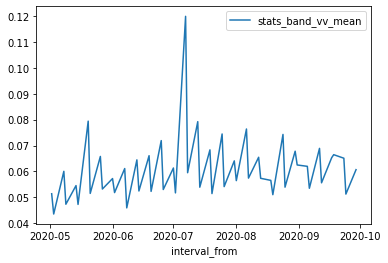

In [12]:
response._dfs[ 0 ].plot( x='interval_from', y='stats_band_vv_mean' )